<a href="https://colab.research.google.com/github/NickSneo/Innovaccer_ML/blob/master/INN_first_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
dataurl = '/content/drive/My Drive/innovacer/ml/BreastCancer_Prognostic_v1.xlsx'

In [196]:
df=pd.read_excel(dataurl)
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [197]:
df.shape

(198, 35)

In [198]:
df.describe()

,ID,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         198 non-null    int64  
 1   Outcome                    198 non-null    object 
 2   Time                       198 non-null    int64  
 3   radius_mean                198 non-null    float64
 4   texture_mean               198 non-null    float64
 5   perimeter_mean             198 non-null    float64
 6   area_mean                  198 non-null    float64
 7   smoothness_mean            198 non-null    float64
 8   compactness_mean           198 non-null    float64
 9   concavity_mean             198 non-null    float64
 10  concave_points_mean        198 non-null    float64
 11  symmetry_mean              198 non-null    float64
 12  fractal_dimension_mean     198 non-null    float64
 13  radius_std_dev             198 non-null    float64

In [0]:
y=df["Outcome"]
t=df["Time"]

In [201]:
X = df.drop(["ID", "Outcome","Time"], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [202]:
y_r = [yy for yy in y if yy == 'R']
y_nr = [yy for yy in y if yy == 'N']
print('y_pos: ', len(y_r))
print('y_neg: ', len(y_nr))


y_pos:  47
y_neg:  151


In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

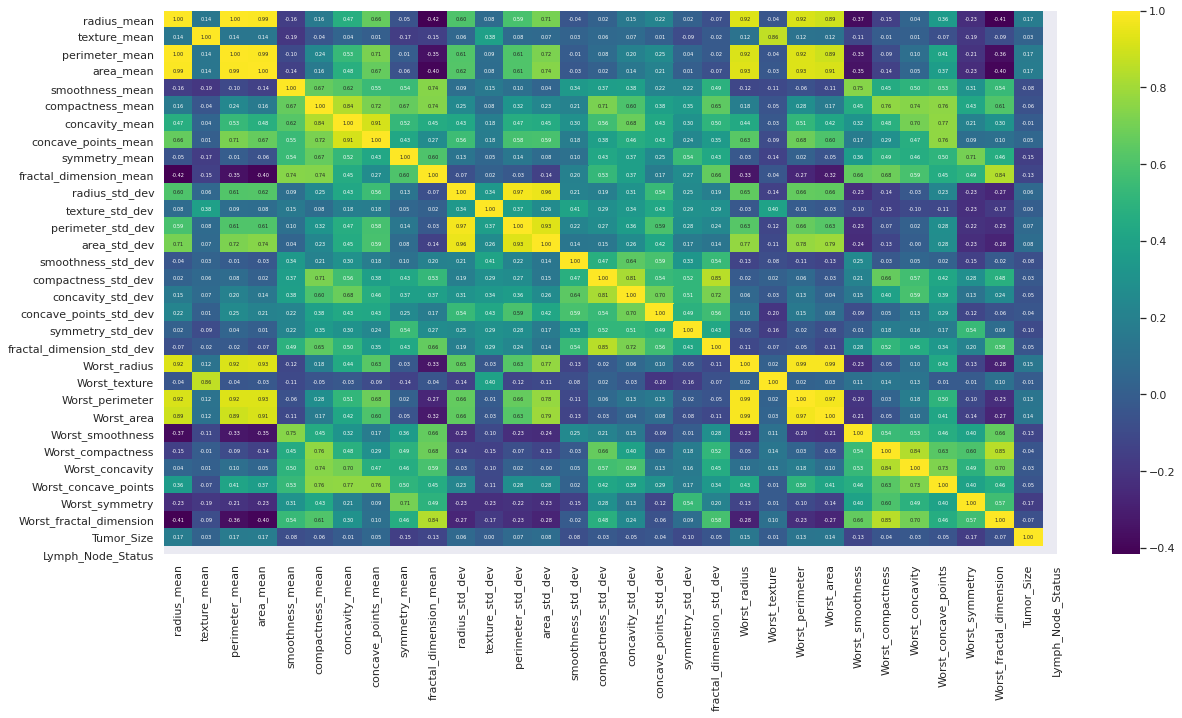

In [204]:
corr = X.corr() 
sns.set(rc={'figure.figsize':(20,10)})
# plot a heatmap
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'viridis') 

In [205]:
X = X.drop(["perimeter_mean", "area_mean", "Worst_radius", "Worst_area","Worst_perimeter","perimeter_std_dev","area_std_dev","Worst_texture"], axis=1)
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,18.02,27.60,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,21.37,17.44,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,22.52,21.92,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,15.44,31.18,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,17.17,29.19,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,21.42,22.84,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


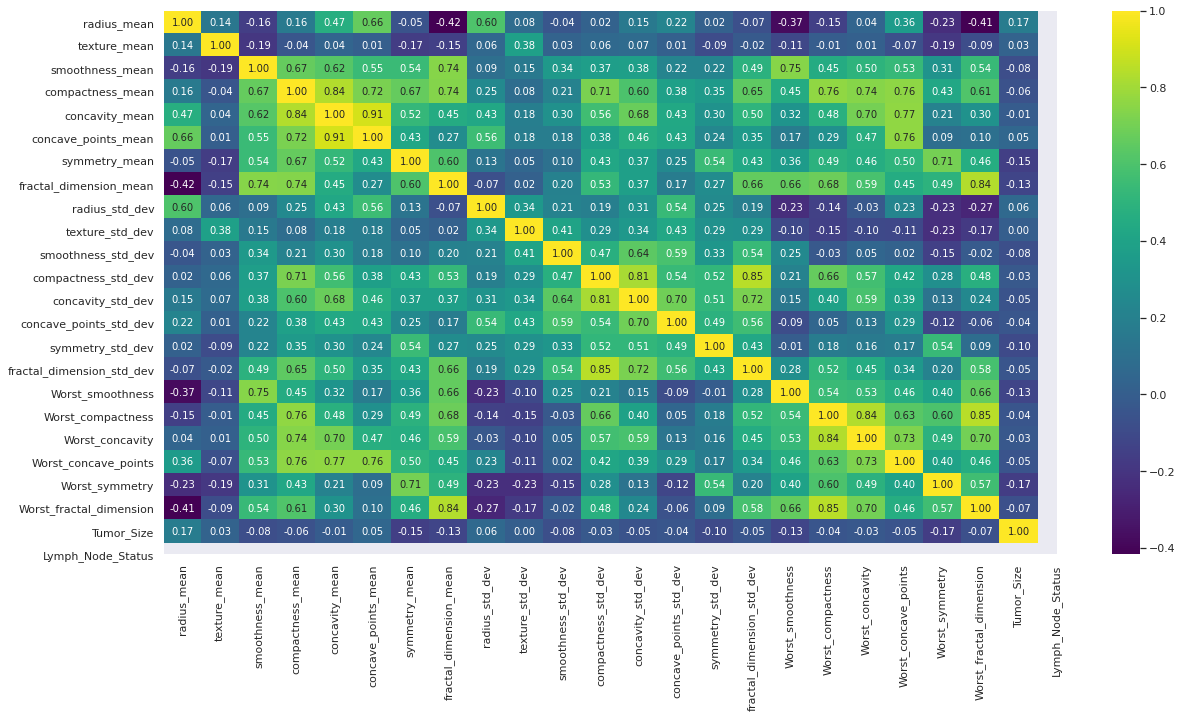

In [206]:
corr = X.corr()
sns.set(rc={'figure.figsize':(20,10)})
# plot a heatmap
sns.heatmap(corr, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'viridis') 

In [0]:
x=X["Lymph_Node_Status"].to_list()
x=pd.to_numeric(x, errors='coerce')

In [208]:
X["Lymph_Status"] = pd.DataFrame(x) 
X = X.drop(["Lymph_Node_Status"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   radius_mean                198 non-null    float64
 1   texture_mean               198 non-null    float64
 2   smoothness_mean            198 non-null    float64
 3   compactness_mean           198 non-null    float64
 4   concavity_mean             198 non-null    float64
 5   concave_points_mean        198 non-null    float64
 6   symmetry_mean              198 non-null    float64
 7   fractal_dimension_mean     198 non-null    float64
 8   radius_std_dev             198 non-null    float64
 9   texture_std_dev            198 non-null    float64
 10  smoothness_std_dev         198 non-null    float64
 11  compactness_std_dev        198 non-null    float64
 12  concavity_std_dev          198 non-null    float64
 13  concave_points_std_dev     198 non-null    float64

In [209]:
X["Lymph_Status"].fillna(0, inplace = True) 
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,18.02,27.60,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,21.37,17.44,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,22.52,21.92,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,15.44,31.18,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,17.17,29.19,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,21.42,22.84,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,0.0


In [210]:
from sklearn.preprocessing import MinMaxScaler
# scalinng the data

names = X.columns[0:24]
scaler = MinMaxScaler() 
X_sc = scaler.fit_transform(X.iloc[:,0:24]) 
X_sc = pd.DataFrame(X_sc, columns=names)

X_sc

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Status
0,0.434542,0.595848,0.285673,0.216883,0.210069,0.277738,0.321594,0.277177,0.265260,0.486453,0.062045,0.053595,0.160997,0.137260,0.172441,0.209884,0.267183,0.140351,0.253067,0.336803,0.219200,0.171127,0.479167,0.185185
1,0.432698,0.000000,0.622831,0.872621,0.685467,0.700923,0.641455,0.603094,0.554516,0.172944,0.131118,0.325592,0.322068,0.313702,0.421642,0.445045,0.570687,0.610208,0.600269,0.904711,0.598462,0.418864,0.270833,0.074074
2,0.640443,0.244291,0.192026,0.274543,0.252023,0.339930,0.591801,0.208731,0.240955,0.079086,0.122967,0.211967,0.166039,0.377640,0.438966,0.344461,0.262208,0.291639,0.276976,0.666679,0.545831,0.233701,0.218750,0.000000
3,0.028888,0.346021,0.968450,0.896363,0.539745,0.469291,0.744226,1.000000,0.185700,0.252762,0.226364,0.525040,0.343745,0.395824,0.985151,0.707836,0.909020,0.809574,0.578454,0.874479,1.000000,0.773711,0.166667,0.000000
4,0.574063,0.137024,0.363258,0.326927,0.432004,0.464315,0.289261,0.181818,0.346665,0.133465,0.309981,0.134811,0.345778,0.401103,0.184245,0.351085,0.394413,0.152669,0.328109,0.510926,0.157500,0.142595,0.322917,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.711125,0.399308,0.013624,0.171735,0.110819,0.239704,0.242494,0.050223,0.726188,0.620809,0.061659,0.151836,0.100783,0.445389,0.323218,0.247102,0.000000,0.080054,0.071220,0.247943,0.097773,0.018628,0.583333,0.074074
194,0.275968,0.719723,0.272766,0.226682,0.281813,0.247056,0.246536,0.228862,0.079806,0.470216,0.123353,0.105683,0.130965,0.164711,0.253922,0.181382,0.321913,0.183661,0.238669,0.381195,0.265918,0.165289,0.114583,0.000000
195,0.382299,0.650865,0.208662,0.077256,0.103893,0.167892,0.280023,0.077771,0.256153,0.338406,0.148368,0.064138,0.155126,0.133153,0.370431,0.025277,0.314095,0.105186,0.165896,0.253377,0.354228,0.034698,0.343750,0.000000
196,0.643516,0.431142,0.459343,0.557189,0.531304,0.616341,0.332564,0.306633,0.548363,0.154351,0.146295,0.219151,0.290080,0.367374,0.131892,0.252070,0.482550,0.384021,0.451231,0.736711,0.249754,0.228060,0.270833,0.000000


In [211]:
l = LabelEncoder()
y = l.fit_transform(y)
y

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [0]:
# from collections import Counter
# from numpy import where
# from matplotlib import pyplot

# counter = Counter(y)
# print(counter)

# # scatter plot of examples by class label
# for label, _ in counter.items():
# 	row_ix = where(y == label)[0]
# 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.15)

In [214]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 43
Before OverSampling, counts of label '0': 125 

After OverSampling, the shape of train_X: (250, 24)
After OverSampling, the shape of train_y: (250,) 

After OverSampling, counts of label '1': 125
After OverSampling, counts of label '0': 125


In [0]:
# Neural Network applied and its analysis

In [0]:
from keras import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
#First Input Layer
classifier.add(Dense(30, init= 'uniform' ,activation='relu', input_dim=24))
#dropout
classifier.add(Dropout(p=0.1))
#Second  Hidden Layer
classifier.add(Dense(30, init= 'uniform', activation='relu'))
#dropout
classifier.add(Dropout(p=0.1))
#Output Layer
classifier.add(Dense(1, init= 'uniform', activation='sigmoid'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [217]:
classifier.fit(X_train,y_train, batch_size=10, epochs=300)

Epoch 1/300
168/168 [==============================] - 0s 785us/step - loss: 0.6838 - accuracy: 0.7202
Epoch 2/300
168/168 [==============================] - 0s 136us/step - loss: 0.6535 - accuracy: 0.7440
Epoch 3/300
168/168 [==============================] - 0s 153us/step - loss: 0.6102 - accuracy: 0.7440
Epoch 4/300
168/168 [==============================] - 0s 145us/step - loss: 0.5941 - accuracy: 0.7440
Epoch 5/300
168/168 [==============================] - 0s 132us/step - loss: 0.5812 - accuracy: 0.7440
Epoch 6/300
168/168 [==============================] - 0s 137us/step - loss: 0.5793 - accuracy: 0.7440
Epoch 7/300
168/168 [==============================] - 0s 144us/step - loss: 0.5814 - accuracy: 0.7440
Epoch 8/300
168/168 [==============================] - 0s 137us/step - loss: 0.5805 - accuracy: 0.7440
Epoch 9/300
168/168 [==============================] - 0s 123us/step - loss: 0.5804 - accuracy: 0.7440
Epoch 10/300
168/168 [==============================] - 0s 149us/step - l

In [0]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
# predict probabilities for test set
yhat_probs = classifier.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = classifier.predict_classes(X_test, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [220]:
# accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
# print("Accuracy: "+ str(accuracy*100)+"%")

eval_model=classifier.evaluate(X_test, y_test)
eval_model
print("Our accuracy is {}%".format((eval_model[1])*100))

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

30/30 [==============================] - 0s 770us/step
Our accuracy is 89.99999761581421%
Precision: 0.600000
Recall: 0.750000
F1 score: 0.666667


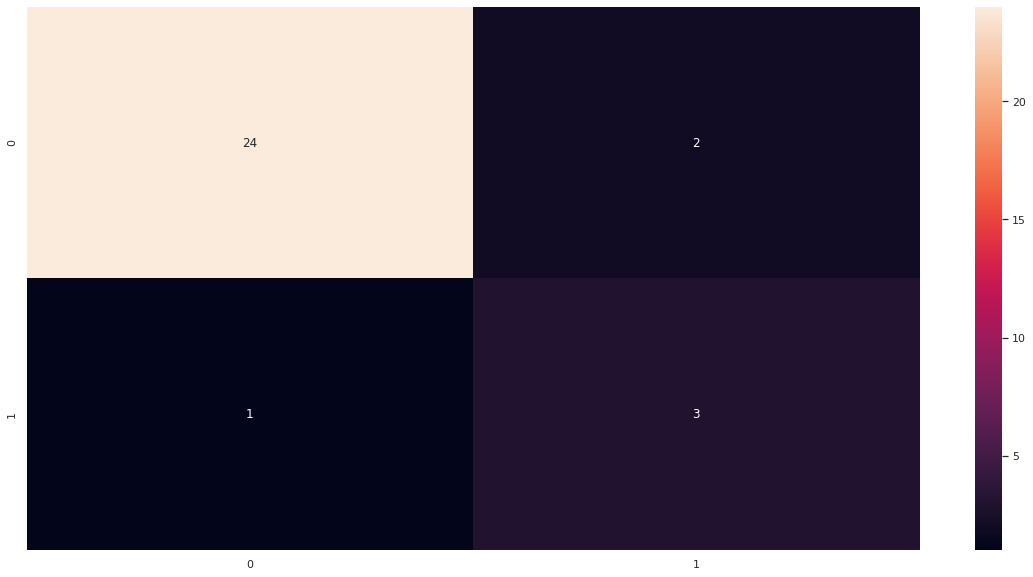

In [221]:
sns.heatmap(cm,annot=True)

In [0]:
# XGBoost
from xgboost import XGBClassifier

In [223]:
xgbo = XGBClassifier()
xgbo.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [224]:
print(xgbo.score(X_test,y_test))

0.8333333333333334


In [225]:
y_pred = xgbo.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[24  2]
 [ 3  1]]


In [0]:
# Logistic Regression

Best parameters : {'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}


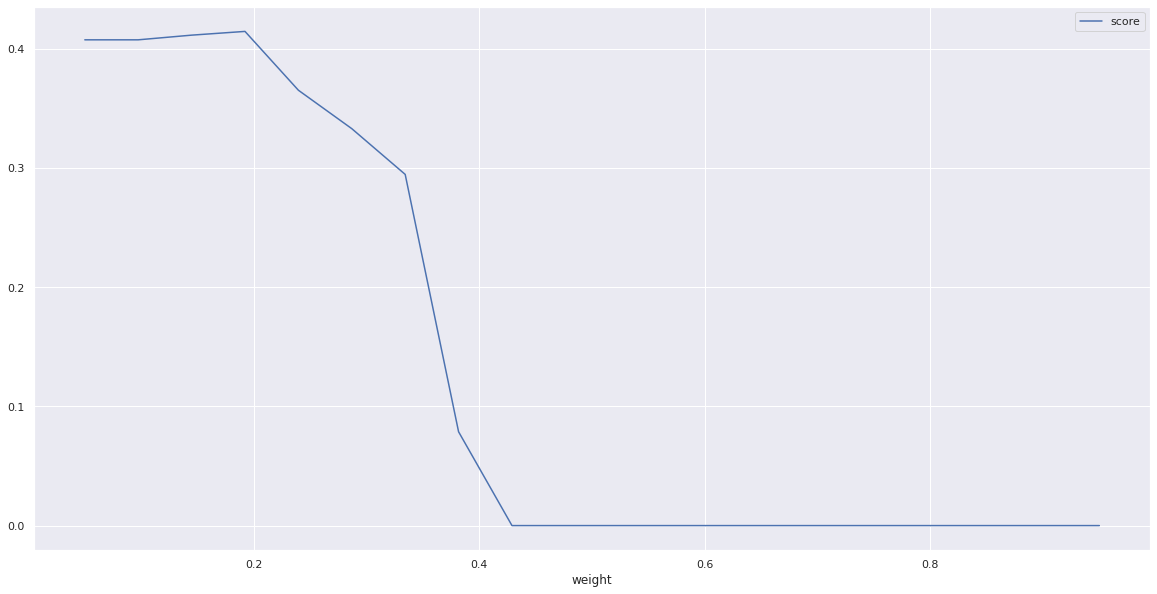

In [227]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [228]:
from imblearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

weight = grid_result.best_params_['class_weight'][0]
pipe = make_pipeline(    
    LogisticRegression(class_weight=weight)
)

# Fit..
pipe.fit(X_train, y_train)

# Predict..
y_pred = pipe.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30



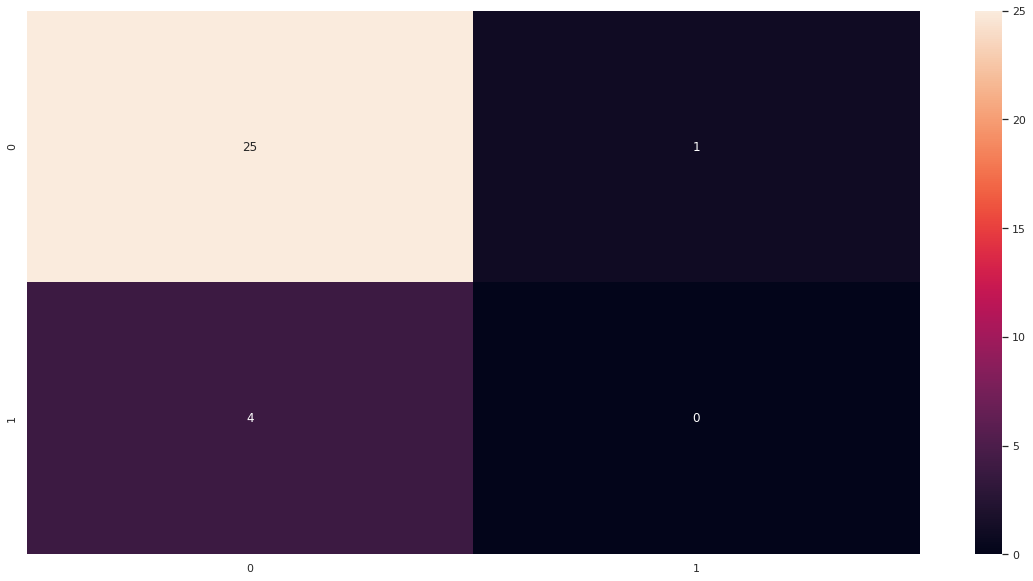

In [229]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [0]:
# LDA

In [231]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='lsqr')
LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [232]:
print(LDA.score(X_test,y_test))

0.8


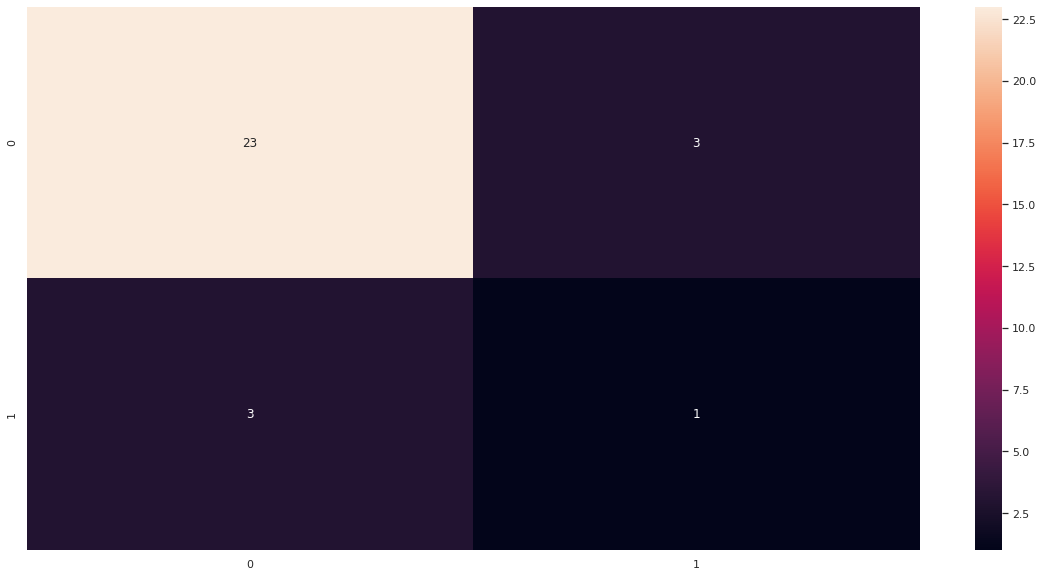

In [233]:
y_pred = LDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)